In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [4]:
# Loading the dataset
df = pd.read_csv("gld_price_data.csv")
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
df.shape

(2290, 6)

In [11]:
df.dtypes

Date        object
SPX        float64
GLD        float64
USO        float64
SLV        float64
EUR/USD    float64
dtype: object

In [10]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [13]:
# Statistical Measures of the data
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [16]:
print(df.dtypes)

Date        object
SPX        float64
GLD        float64
USO        float64
SLV        float64
EUR/USD    float64
dtype: object


In [18]:
# Convert a column with date strings to datetime objects
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop rows with invalid data
df = df.dropna()

In [19]:
correlation = df.corr()

<Axes: >

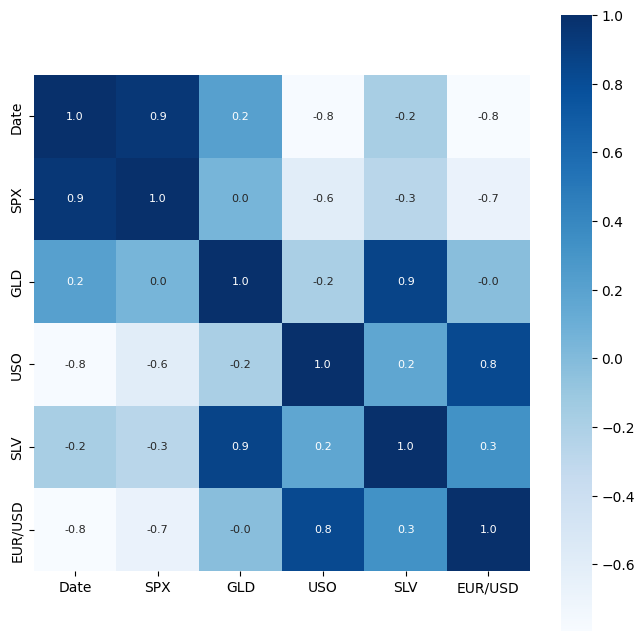

In [20]:
# Constructing a heatmap
plt.figure(figsize = (8,8))
sns.heatmap(correlation,cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [21]:
# Correlation values of gold
print(correlation['GLD'])

Date       0.209118
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\Ketan\AppData\Local\Temp\ipykernel_16756\3030174981.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

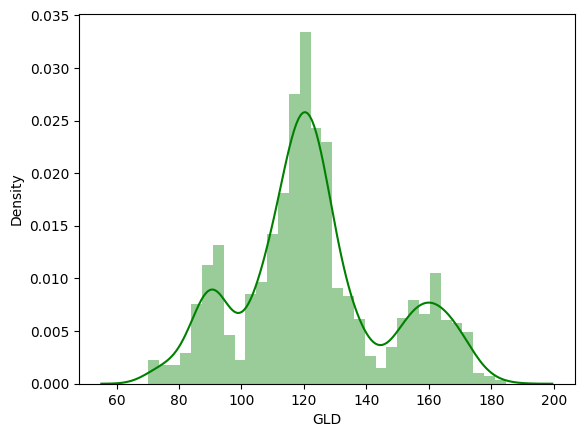

In [30]:
# Checking the distribution of the gold price
sns.distplot(df['GLD'],color='green')

In [31]:
X = df.drop(['Date','GLD'],axis = 1)
Y = df[ 'GLD']

In [32]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [33]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [36]:
# Model Training
# Random Forest Regressor- multiple decision trees
reg = RandomForestRegressor(n_estimators = 100)

In [37]:
# Training the model
reg.fit(X_train, Y_train)

RandomForestRegressor()

In [38]:
# Model Evaluation
test_data_prediction = reg.predict(X_test)
print(test_data_prediction)

[168.65199963  82.07649975 115.9251003  127.69160097 120.58050143
 154.63629757 149.97479827 126.16230032 117.35179887 125.99780075
 116.77760085 172.41300092 141.44629813 167.86609833 115.04700023
 117.66790052 138.08450273 170.14840109 159.48570291 160.43299978
 155.17129982 125.15840008 175.86419961 157.1105028  125.3536005
  93.64559914  77.19570028 120.53729997 119.02669891 167.11689894
  88.33100107 125.34340007  91.07400098 117.85109993 121.06849861
 135.99940079 115.44330108 115.56750044 147.15450008 107.24190127
 104.12710222  87.14469771 126.50450058 117.95520022 152.10749867
 119.60220003 108.34660039 108.0420979   93.28890053 127.03359825
  74.51230052 113.66929952 121.56510016 111.17399938 118.79719898
 120.73379942 160.06039912 168.19650037 147.23379685  85.82339858
  94.41410054  86.70179845  90.59229978 118.98470078 126.46450062
 127.57989976 169.20270008 122.247599   117.17069924  98.61369991
 168.42140034 142.96749823 132.45920246 121.11210243 121.01249932
 119.737800

In [39]:
# R squared error
error_score = metrics.r2_score(Y_test,test_data_prediction)
print("R Squared Error: ",error_score)

R Squared Error:  0.9894699948608718


In [40]:
# Compare the actual values and predicted values in a plot
Y_test = list(Y_test)

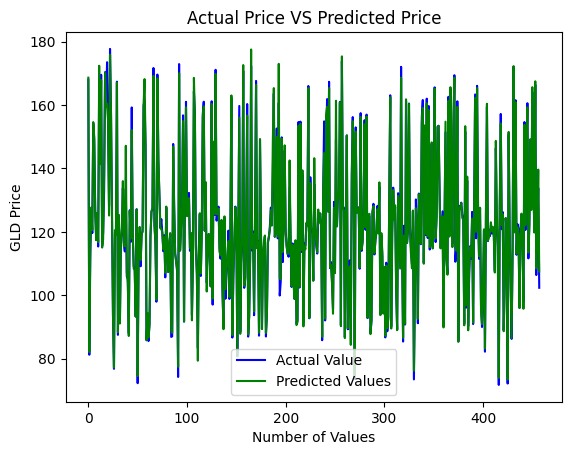

In [43]:
plt.plot(Y_test, color='blue', label= 'Actual Value')
plt.plot(test_data_prediction, color= 'green', label= 'Predicted Values')
plt.title("Actual Price VS Predicted Price")
plt.xlabel("Number of Values")
plt.ylabel("GLD Price")
plt.legend()
plt.show()

                                Date          SPX          GLD          USO  \
count                           2290  2290.000000  2290.000000  2290.000000   
mean   2013-03-17 08:23:41.135371008  1654.315776   122.732875    31.842221   
min              2008-01-02 00:00:00   676.530029    70.000000     7.960000   
25%              2010-08-20 00:00:00  1239.874969   109.725000    14.380000   
50%              2013-03-13 12:00:00  1551.434998   120.580002    33.869999   
75%              2015-10-25 00:00:00  2073.010070   132.840004    37.827501   
max              2018-05-16 00:00:00  2872.870117   184.589996   117.480003   
std                              NaN   519.111540    23.283346    19.523517   

               SLV      EUR/USD  
count  2290.000000  2290.000000  
mean     20.084997     1.283653  
min       8.850000     1.039047  
25%      15.570000     1.171313  
50%      17.268500     1.303297  
75%      22.882500     1.369971  
max      47.259998     1.598798  
std       7.0925

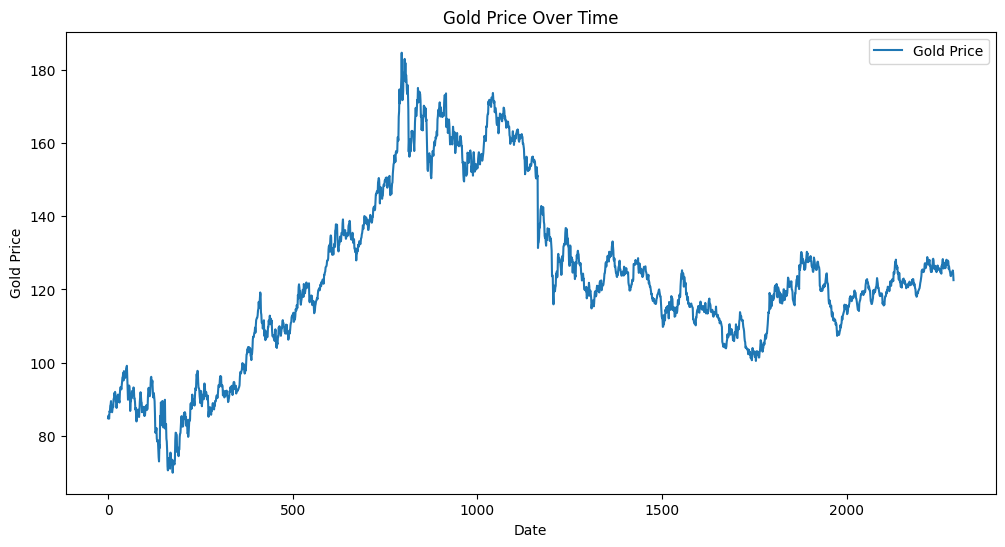

In [44]:
# Statistical summary of the data
print(df.describe())

# Visualizing trends and seasonality
plt.figure(figsize=(12, 6))
plt.plot(df['GLD'], label='Gold Price')
plt.title('Gold Price Over Time')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.legend()
plt.show()

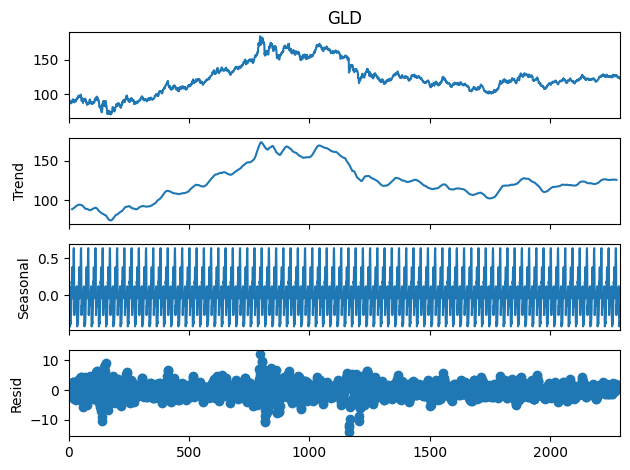

In [47]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose time series into trend, seasonal, and residual components
result = seasonal_decompose(df['GLD'], model='additive', period=30)
result.plot()
plt.show()

                                     SARIMAX Results                                      
Dep. Variable:                                GLD   No. Observations:                 2290
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -4236.021
Date:                            Fri, 19 Jan 2024   AIC                           8482.041
Time:                                    01:24:41   BIC                           8510.694
Sample:                                         0   HQIC                          8492.493
                                           - 2290                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9864      0.011    -90.410      0.000      -1.008      -0.965
ma.L1          0.9736      0.014   

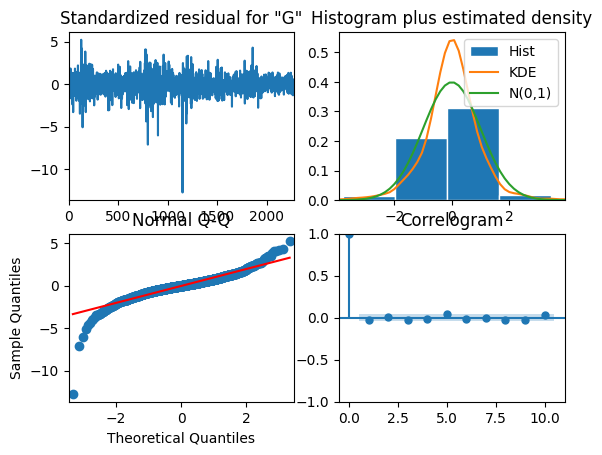

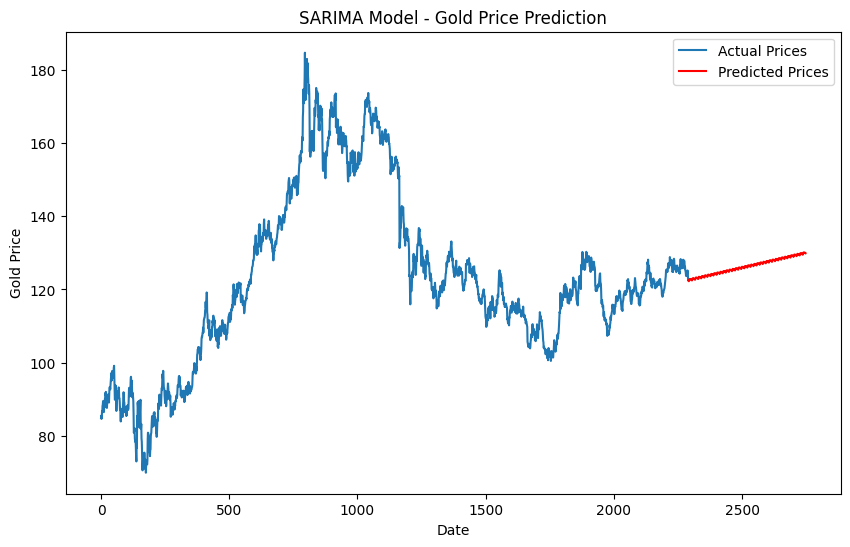

In [49]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Fit SARIMA model
sarima_model = SARIMAX(df['GLD'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit(disp=False)

# Print model summary and diagnostics
print(sarima_result.summary())
sarima_result.plot_diagnostics()
plt.show()

# Generate and plot predictions
sarima_predictions = sarima_result.get_forecast(steps=len(X_test))

plt.figure(figsize=(10, 6))
plt.plot(df['GLD'], label='Actual Prices')
plt.plot(sarima_predictions.predicted_mean, label='Predicted Prices', color='red')
plt.title('SARIMA Model - Gold Price Prediction')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.legend()
plt.show()


In [51]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}

# Create RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Perform grid search
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, Y_train)

# Print best parameters
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': None, 'n_estimators': 200}
